# Exploratory Data Analysis

Dataset Link: [Kaggle](https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset/data)

Libraires

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Fetching datatset

In [25]:
dataset = pd.read_csv('yield_df.csv')

dataset.shape

(28242, 8)

In [26]:
dataset.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Dropping the feature 'Unnamed'

In [27]:
dataset = dataset.drop(columns=['Unnamed: 0'], errors='ignore')
dataset.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Dataset description

In [28]:
dataset.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


Distribution record across crops

In [30]:
item_counts=dataset['Item'].value_counts()
print(item_counts)

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


Visualization of tbe crops distribution

<ipython-input-31-ddcf85e00247>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=item_counts.index, x=item_counts.values, palette='Blues_r')


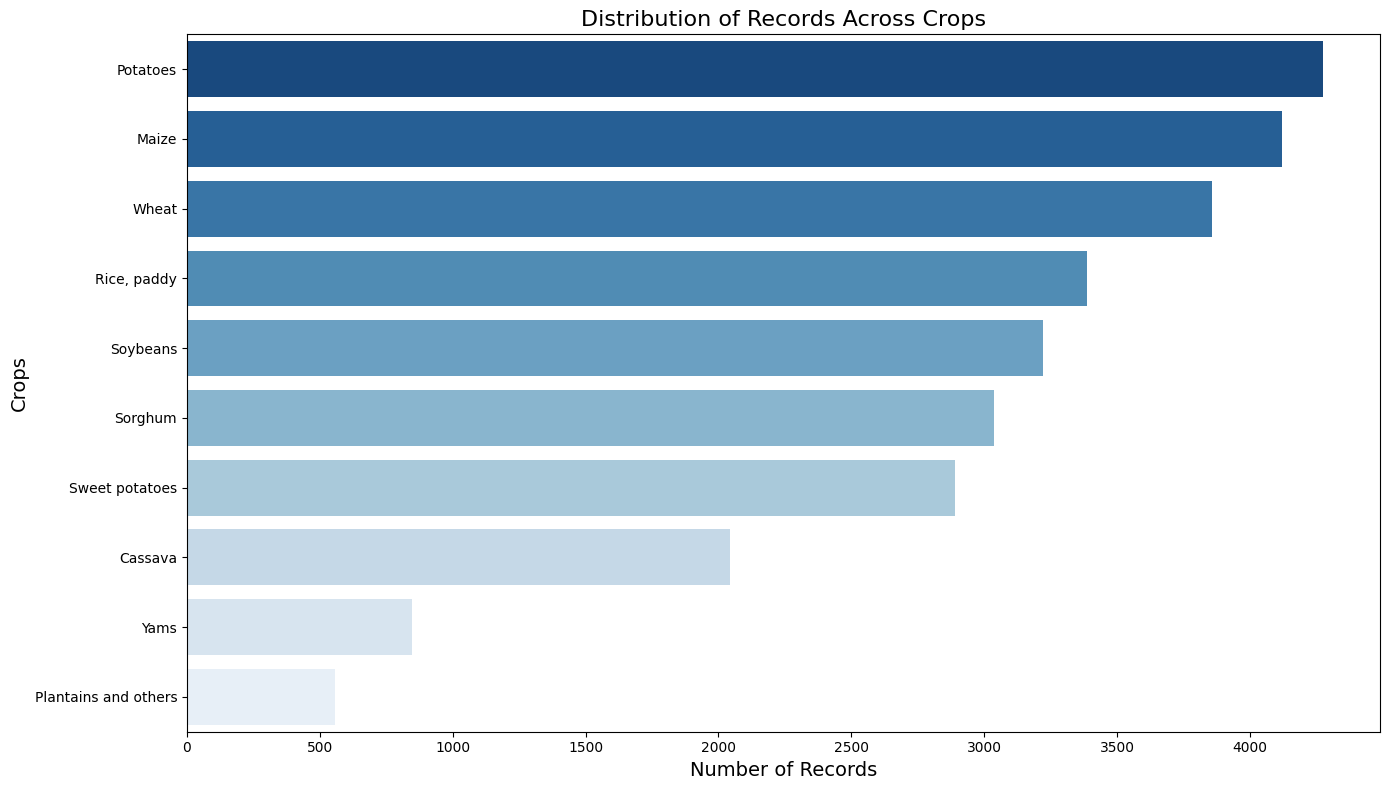

In [31]:
plt.figure(figsize=(14, 8))
sns.barplot(y=item_counts.index, x=item_counts.values, palette='Blues_r')
plt.title('Distribution of Records Across Crops', fontsize=16)
plt.xlabel('Number of Records', fontsize=14)
plt.ylabel('Crops', fontsize=14)

plt.tight_layout()
plt.show()


Crops trend over the year

In [32]:
key_crops = dataset.groupby('Item')['hg/ha_yield'].sum().nlargest(5).index

In [33]:
filtered_data = dataset[dataset['Item'].isin(key_crops)]

highest_year = filtered_data['Year'].max()
print(f"The highest year that the data has been collected is: {highest_year}")
yield_over_time = filtered_data.groupby(['Year', 'Item'])['hg/ha_yield'].mean().reset_index()

The highest year that the data has been collected is: 2013


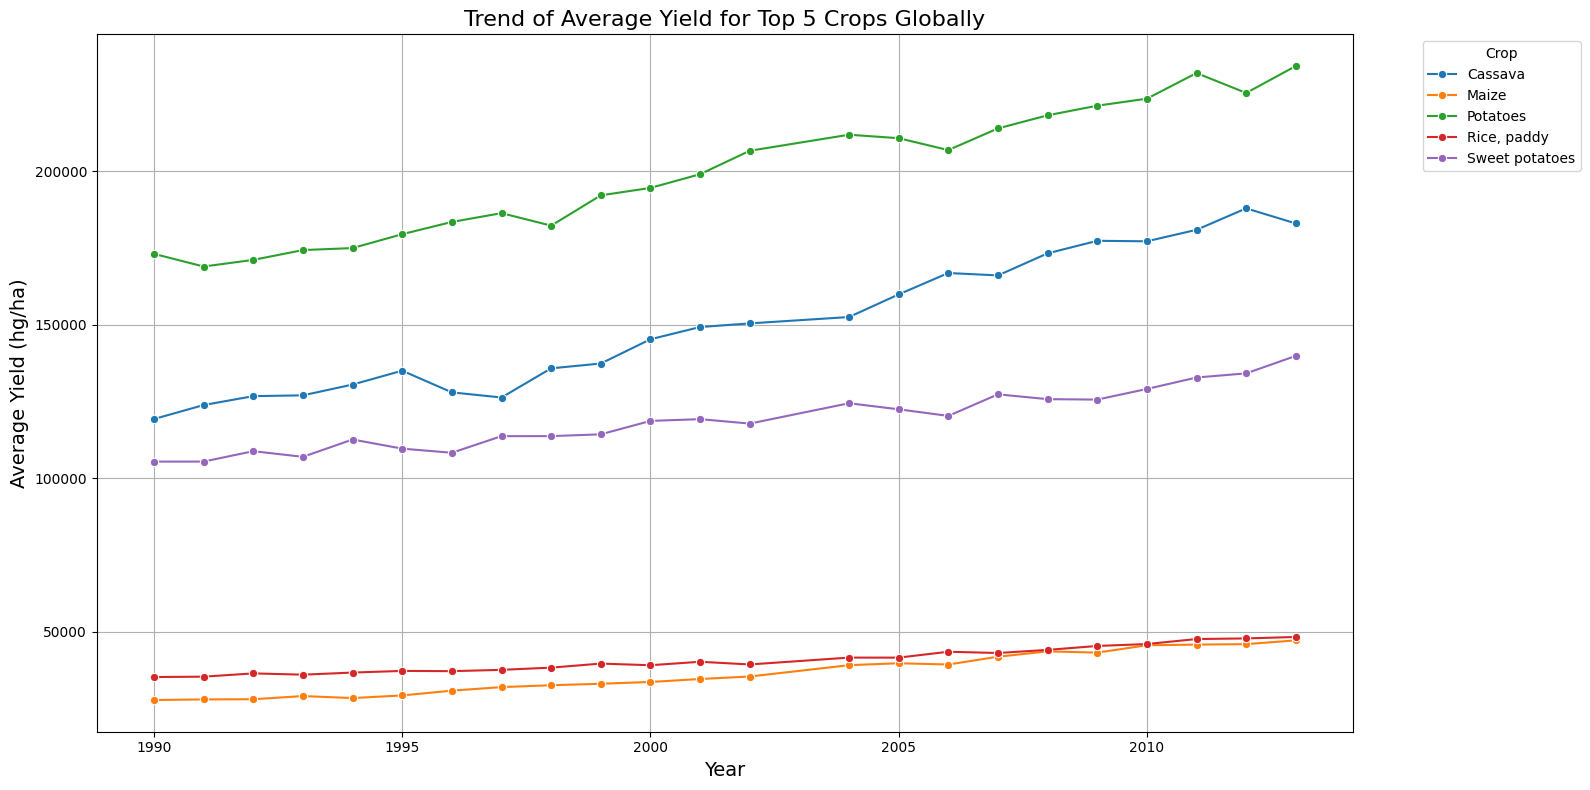

In [34]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=yield_over_time, x='Year', y='hg/ha_yield', hue='Item', marker='o')

plt.title('Trend of Average Yield for Top 5 Crops Globally', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Yield (hg/ha)', fontsize=14)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


Top 10 countries showing the highest and the lowest crop yield

In [35]:
dataset['Area'].nunique() # output shows the total country is 101

101

In [36]:
top_ten_country_yield=dataset.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)
print(top_ten_country_yield)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64


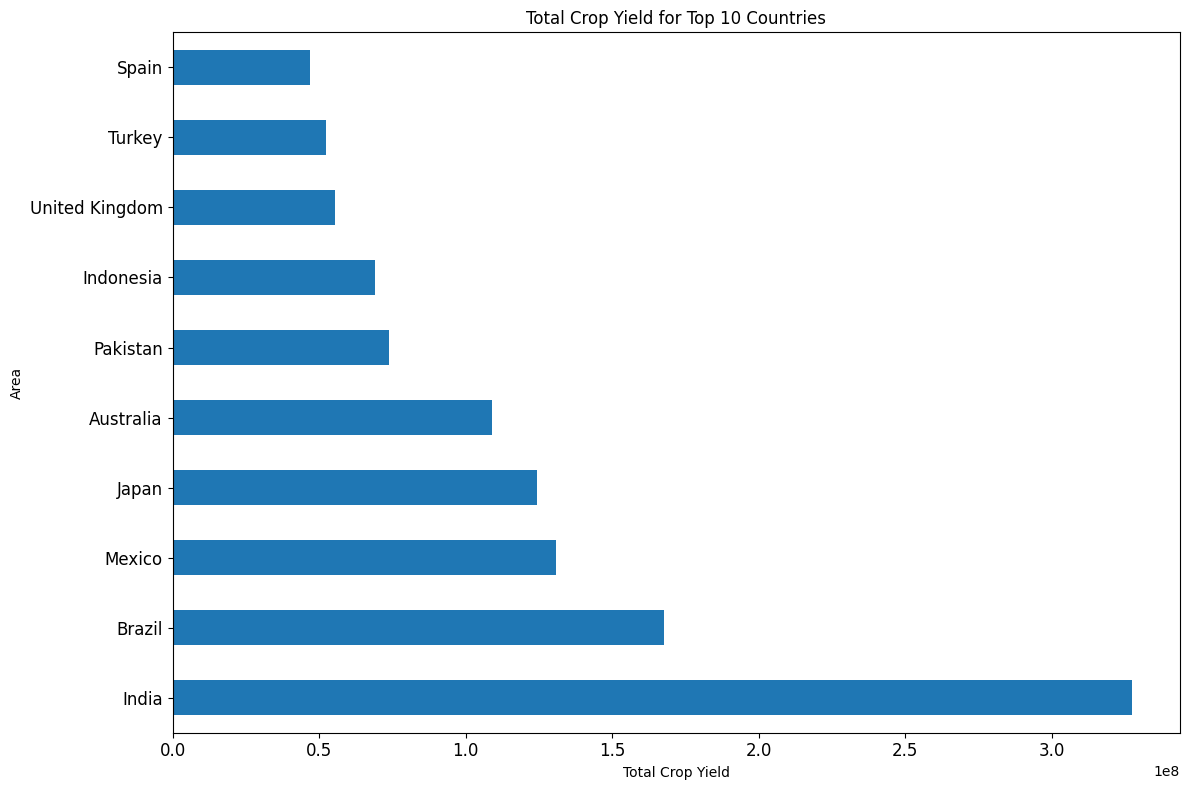

In [37]:
plt.figure(figsize=(12, 8))
top_ten_country_yield.plot(kind='barh', fontsize=12)
plt.title('Total Crop Yield for Top 10 Countries')
plt.xlabel('Total Crop Yield')
plt.ylabel('Area')

plt.tight_layout()
plt.show()


India's crop yield distribution across all crops

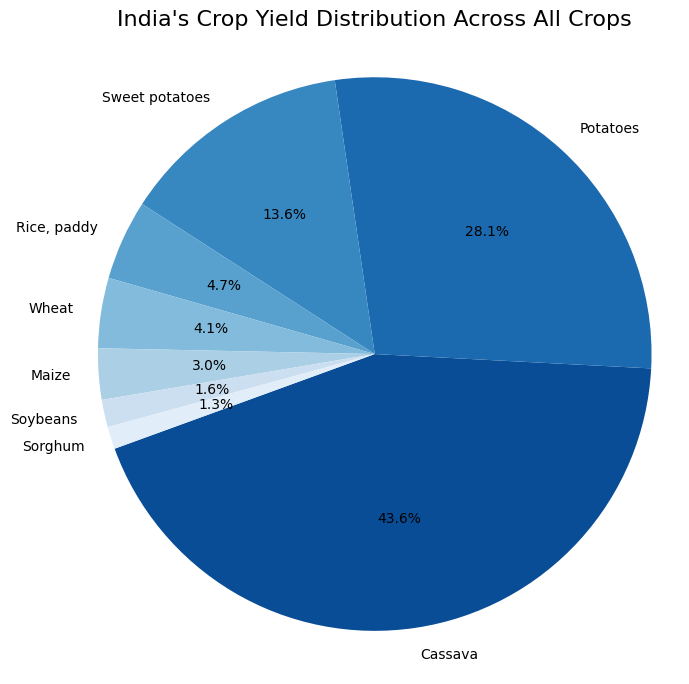

In [38]:
india_data = dataset[dataset['Area'] == 'India'].groupby('Item')['hg/ha_yield'].sum().sort_values(ascending=False)

colors = sns.color_palette("Blues_r", len(india_data))
plt.figure(figsize=(7, 7))
plt.pie(india_data, labels=india_data.index, autopct='%1.1f%%', startangle=200, colors=colors)
plt.title("India's Crop Yield Distribution Across All Crops", fontsize=16)
plt.axis('equal')

plt.tight_layout()
plt.show()


Top 10 countries showing the top 5 kind of crops yield  

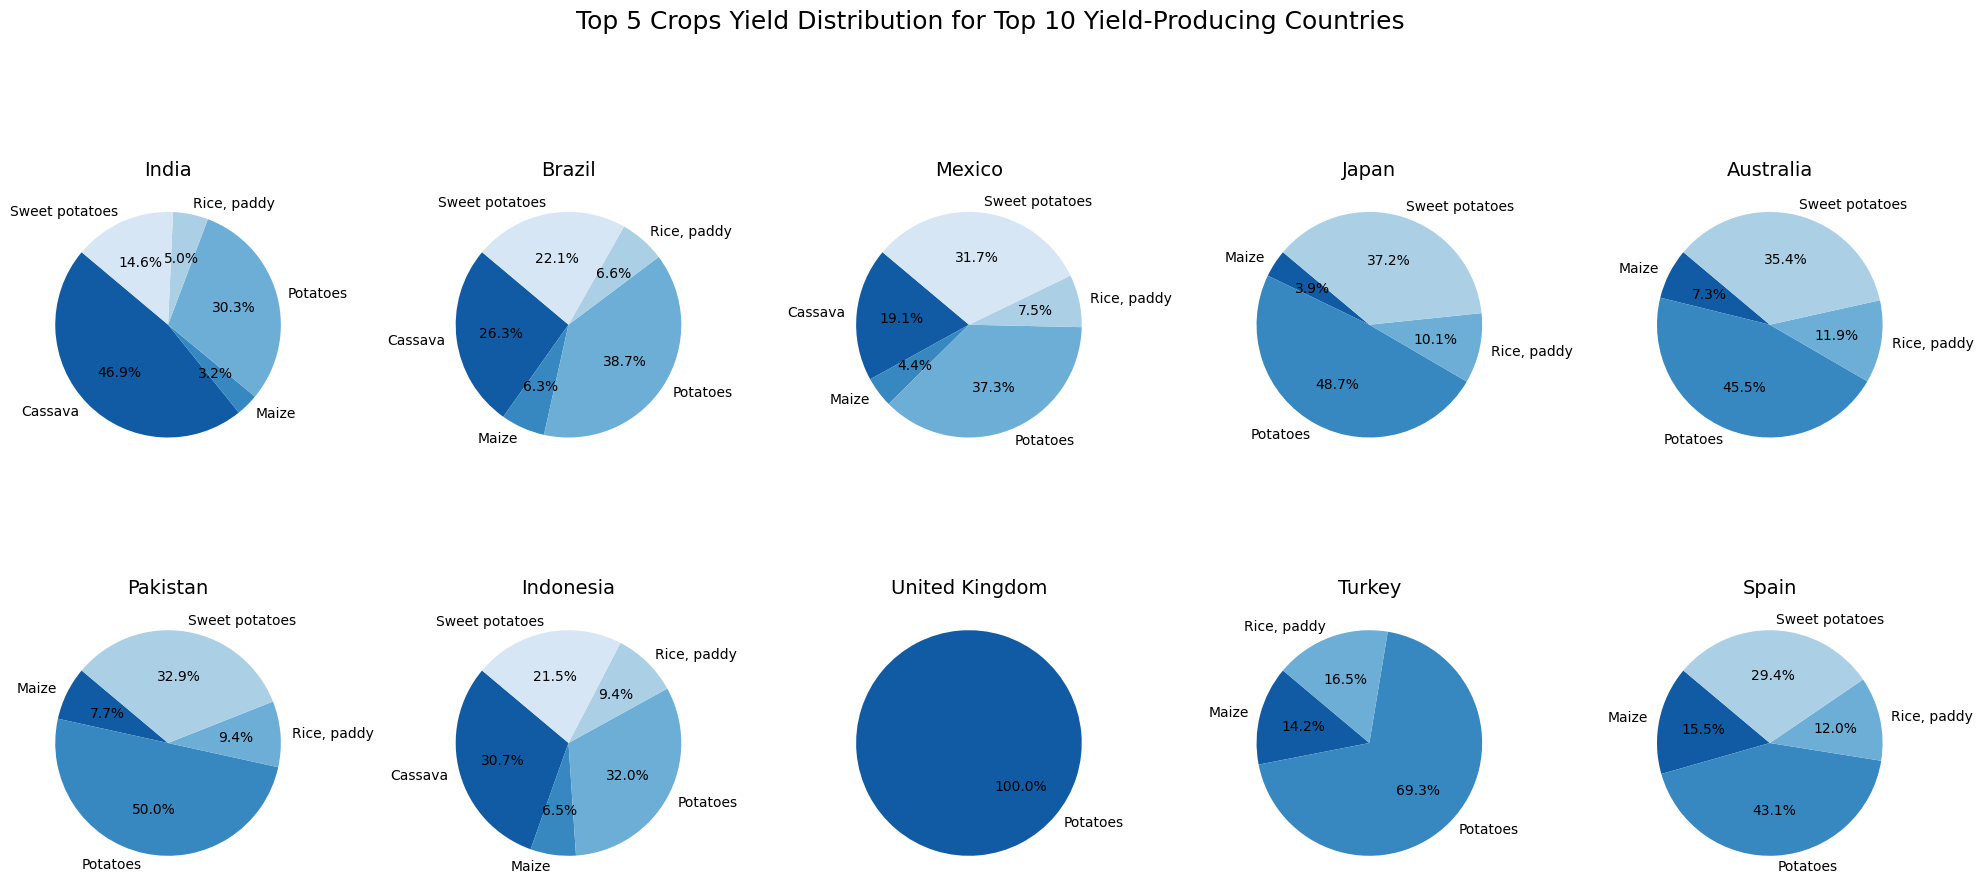

In [46]:
# Run this cell after one hot encoding for visualization
top_five_global_crops = dataset.groupby('Item')['hg/ha_yield'].sum().nlargest(5).index

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

colors = sns.color_palette("Blues_r", len(top_five_global_crops))

for i, country in enumerate(top_ten_country_yield):
    country_data = dataset[(dataset['Area'] == country) & (dataset['Item'].isin(top_five_global_crops))].groupby('Item')['hg/ha_yield'].sum()
    axes[i].pie(country_data, labels=country_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(country, fontsize=14)

plt.suptitle('Top 5 Crops Yield Distribution for Top 10 Yield-Producing Countries', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

In [40]:
dataset.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Cassava         Brazil             33671231
Potatoes        Pakistan           32969754
Sweet potatoes  Japan              32794236
Potatoes        Turkey             30530955
Yams            Japan              29165394
Sweet potatoes  Brazil             28266502
Potatoes        South Africa       27341980
                Germany            26672181
Yams            Brazil             23472053
Sweet potatoes  Pakistan           21687615
Name: hg/ha_yield, dtype: int64

Relationship between Crop Yield and temparature, rainfall and pesticide usage

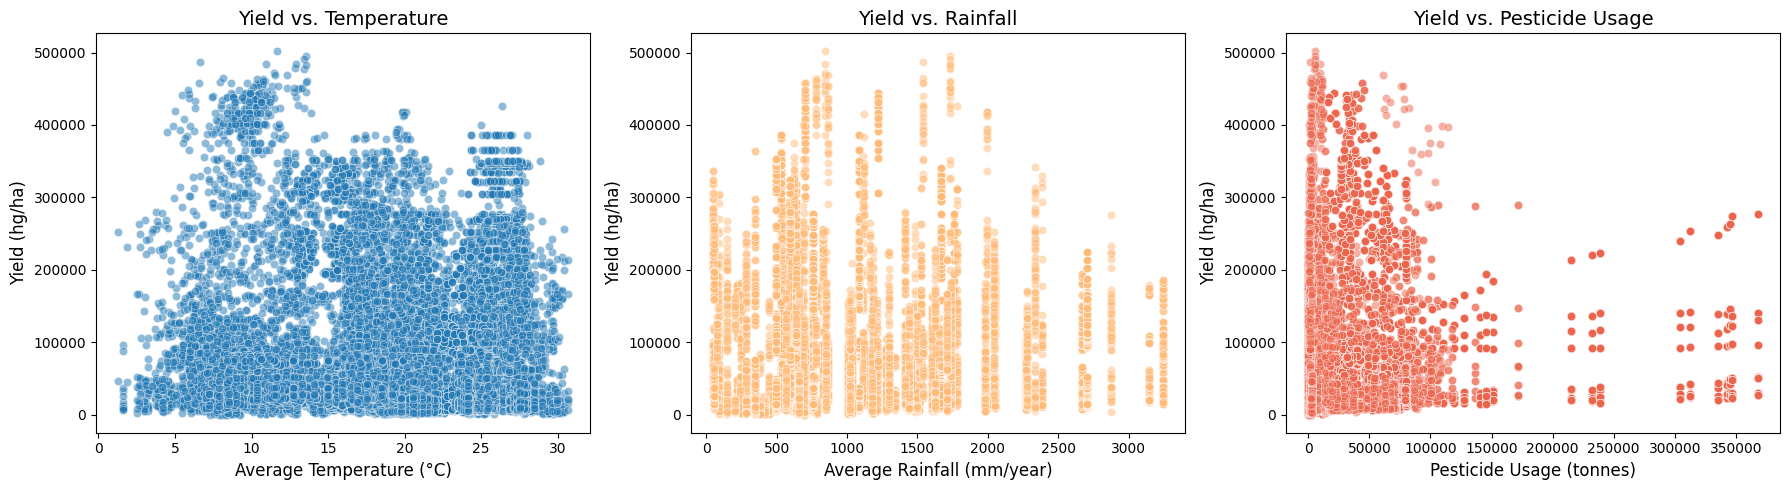

In [41]:
plt.figure(figsize=(18, 5))

# Yield vs. Temperature
plt.subplot(1, 3, 1)
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=dataset, alpha=0.5, color='#1f77b4')
plt.title('Yield vs. Temperature', fontsize=14)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)

# Yield vs. Rainfall
plt.subplot(1, 3, 2)
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=dataset, alpha=0.5, color='#ffbb78')
plt.title('Yield vs. Rainfall', fontsize=14)
plt.xlabel('Average Rainfall (mm/year)', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)

# Yield vs. Pesticide Usage
plt.subplot(1, 3, 3)
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=dataset, alpha=0.5, color='#ec644b')
plt.title('Yield vs. Pesticide Usage', fontsize=14)
plt.xlabel('Pesticide Usage (tonnes)', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)

plt.tight_layout()
plt.show()


Overall relationship between features (yield, pesticides, rainfall, temparature)

In [42]:
top_ten_country_yield=top_ten_country_yield.index
top_country_filtered_data = dataset[dataset['Area'].isin(top_ten_country_yield)]
top_country_group_data = pd.DataFrame({
    'Total_Yield': top_country_filtered_data.groupby('Area')['hg/ha_yield'].sum(),
    'Avg_Rainfall': top_country_filtered_data.groupby('Area')['average_rain_fall_mm_per_year'].mean(),
    'Avg_Pesticides': top_country_filtered_data.groupby('Area')['pesticides_tonnes'].mean(),
    'Avg_Temperature': top_country_filtered_data.groupby('Area')['avg_temp'].mean()})

scaler = MinMaxScaler()
normalized_top_country_data = pd.DataFrame(
    scaler.fit_transform(top_country_group_data),
    columns=top_country_group_data.columns,
    index=top_country_group_data.index)


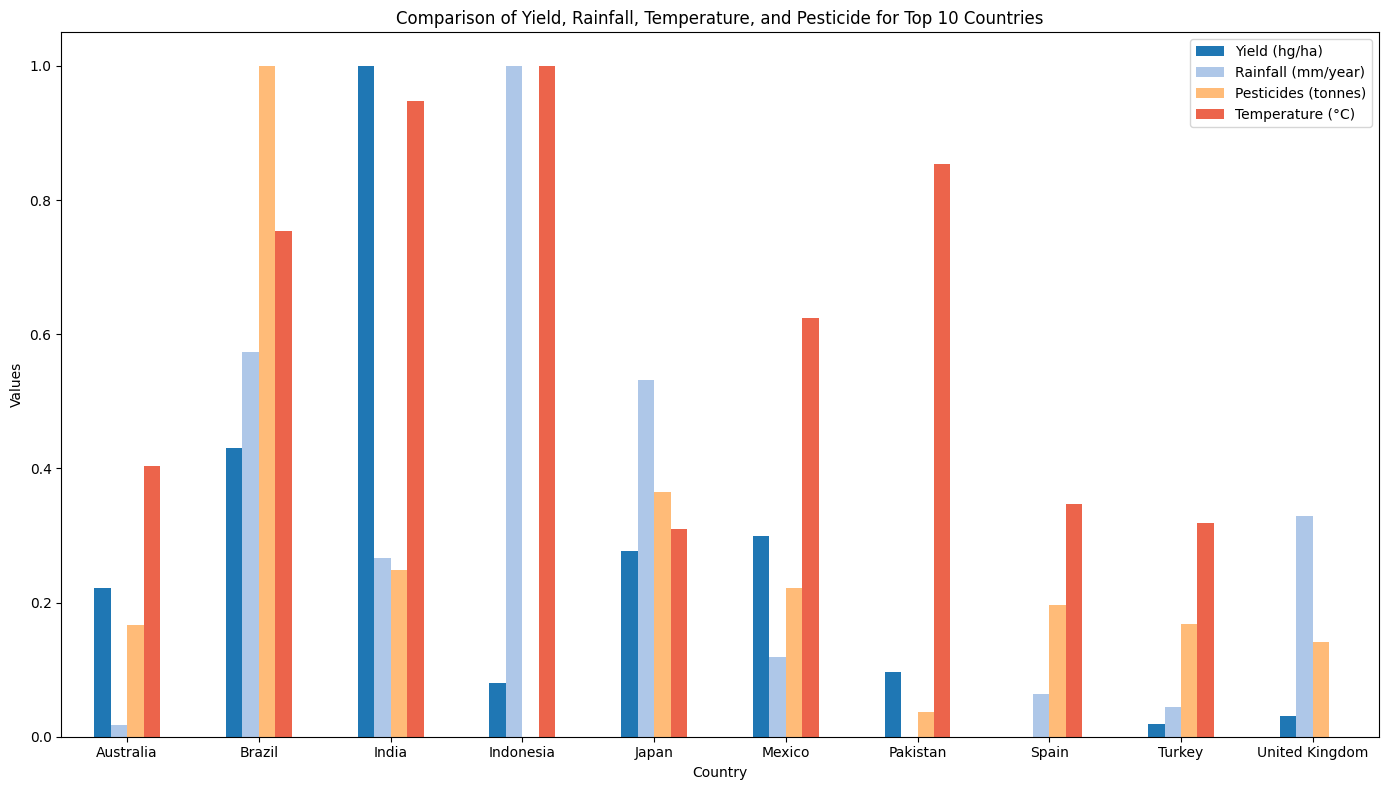

In [43]:
colors = ['#1f77b4', '#aec7e8', '#ffbb78', '#ec644b']

normalized_top_country_data.plot(kind='bar', figsize=(14, 8), color=colors)
plt.title('Comparison of Yield, Rainfall, Temperature, and Pesticide for Top 10 Countries')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.ylabel('Values')
plt.legend(['Yield (hg/ha)', 'Rainfall (mm/year)', 'Pesticides (tonnes)', 'Temperature (°C)'])

plt.tight_layout()
plt.show()


Correlations among features by visualizing the correlation matrix as a heatmap.

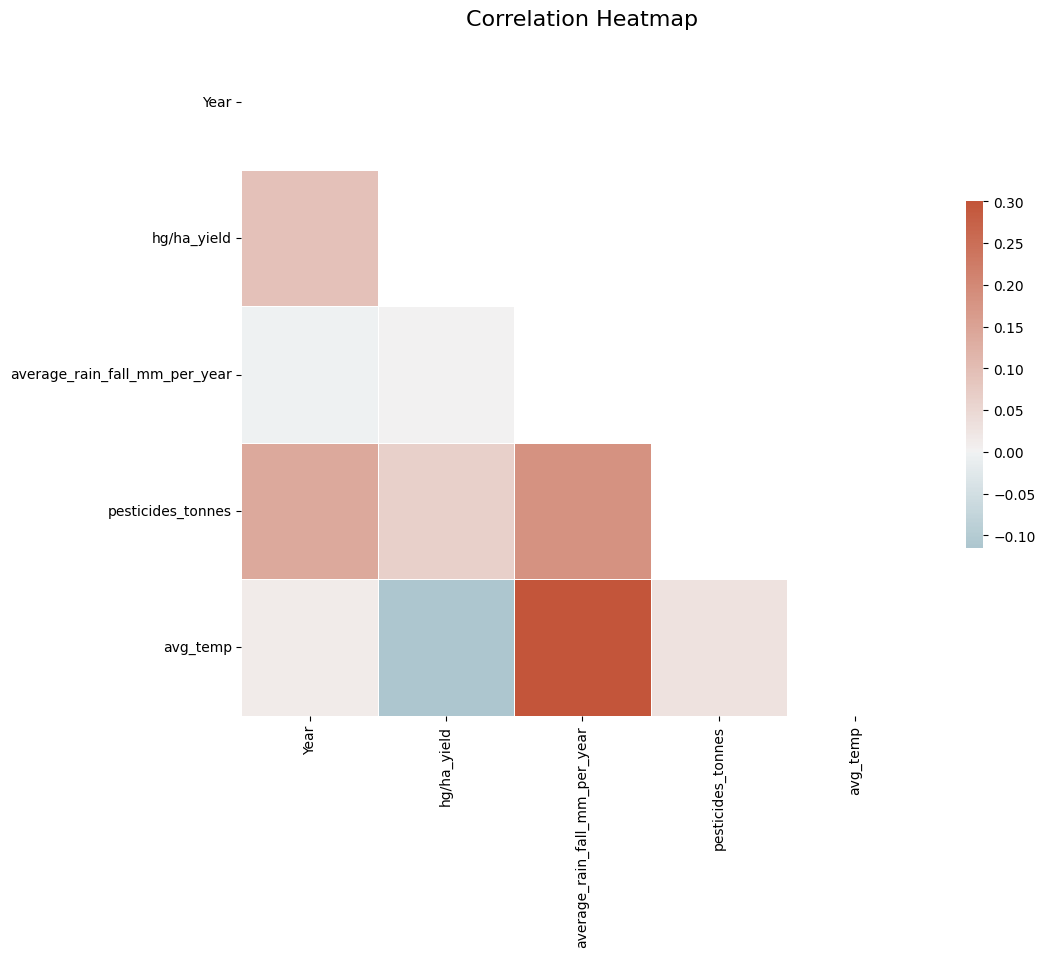

In [44]:
corr_data = dataset.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# Data Preprocessing

In [ ]:
dataset.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
dataset.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


One-hot encoding

In [45]:
dataset_onehot = pd.get_dummies(dataset, columns=['Area',"Item"], prefix = ['Country',"Item"])
dataset_onehot = dataset_onehot.astype(float)
features=dataset_onehot.loc[:, dataset_onehot.columns != 'hg/ha_yield']
label=dataset['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990.0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1990.0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1990.0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1990.0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1990.0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
features.shape

(28242, 115)

In [ ]:
features = features.drop(['Year'], axis=1)
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1485.0,121.0,16.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Scaling Features

In [ ]:
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

Training Data

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

# Methodology: Model Selection, Training and Performance Evaluation

Decision tree regressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(train_data, train_labels)
y_pred = dt.predict(test_data)

dt_r2 = r2_score(test_labels, y_pred)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
rmse= np.sqrt(mean_squared_error(test_labels, y_pred))

print(f"R^2 Score: {dt_r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R^2 Score: 0.958359545756434
MAE: 6047.4008379064135
MSE: 302046195.80065304
RMSE: 17379.476280965806


Random Forest

In [ ]:
rf_model = RandomForestRegressor()

rf_model.fit(train_data, train_labels)
y_pred_rf = rf_model.predict(test_data)

# Predict and calculate R^2
y_pred_rf = rf_model.predict(test_data)

rf_r2 = r2_score(test_labels, y_pred_rf)
mae = mean_absolute_error(test_labels, y_pred_rf)
mse = mean_squared_error(test_labels, y_pred_rf)
rmse= np.sqrt(mean_squared_error(test_labels, y_pred_rf))

print(f"R^2 Score: {rf_r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R^2 Score: 0.9733558602912873
MAE: 5553.737154721864
MSE: 193267849.39290786
RMSE: 13902.080757674654


XGBoost

In [ ]:
xgb_model = XGBRegressor(max_depth=3,learning_rate=0.5,n_estimators=200,random_state=0,eval_metric='logloss')
xgb_model.fit(train_data, train_labels, eval_set=[(test_data, test_labels)], verbose=False)


y_pred = xgb_model.predict(test_data)

xgb_r2 = r2_score(test_labels, y_pred)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
rmse= np.sqrt(mean_squared_error(test_labels, y_pred))

print(f"R^2 Score: {xgb_r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R^2 Score: 0.9513970613479614
MAE: 11726.986328125
MSE: 352549664.0
RMSE: 18776.305919962


Linear Regression

In [ ]:
lr_model = LinearRegression()

lr_model.fit(train_data, train_labels)
y_pred = lr_model.predict(test_data)

lr_r2 = r2_score(test_labels, y_pred)
mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
rmse = np.sqrt(mse)

print(f"R^2 Score: {lr_r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R^2 Score: 0.749296197529476
MAE: 29811.751688043172
MSE: 1818523144.9697878
RMSE: 42644.14549466067


Visualization of the comparison four models

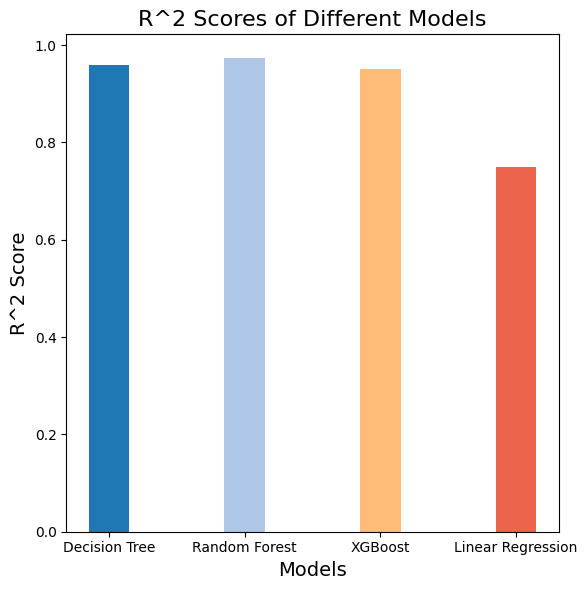

In [ ]:
# models and their R^2 scores
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Linear Regression']
r2_scores = [dt_r2, rf_r2, xgb_r2, lr_r2]
colors = ['#1f77b4', '#aec7e8', '#ffbb78', '#ec644b']

plt.figure(figsize=(6, 6))
plt.bar(models, r2_scores, color=colors, width=0.3)

plt.title('R^2 Scores of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)

plt.tight_layout()
plt.show()

# Kfold for Random Forest

In [ ]:
models = {"Random Forest": RandomForestRegressor()}

In [ ]:
metrics = {
    "R^2": r2_score
}

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(train_data)):
        X_train, X_val = train_data[train_index], train_data[val_index]
        y_train, y_val = train_labels.iloc[train_index], train_labels.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        r2_scores.append(metrics["R^2"](y_val, y_pred))

        print(f"  Fold {fold + 1}:")
        print(f"  R^2: {r2_scores[-1]:.4f}")

    print(f"\nAverage Metrics:")
    print(f"  R^2: {np.mean(r2_scores):.4f}")

Evaluating Random Forest:
  Fold 1:
  R^2: 0.9749
  Fold 2:
  R^2: 0.9719
  Fold 3:
  R^2: 0.9743
  Fold 4:
  R^2: 0.9767
  Fold 5:
  R^2: 0.9701

Average Metrics:
  R^2: 0.9736


Visualization: Bar plot for R² scores across folds

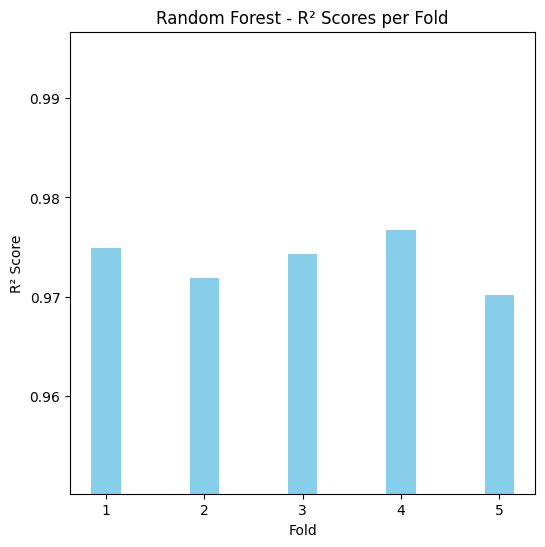

In [ ]:
folds = np.arange(1, len(r2_scores) + 1)
plt.figure(figsize=(6, 6))
plt.bar(folds, r2_scores, color='SkyBlue', width=0.3)

plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title(f"{model_name} - R² Scores per Fold")
plt.xticks(folds)

plt.ylim([max(0.00, min(r2_scores) - 0.02), max(r2_scores) + 0.02])
plt.show()

# Feature Engineering

PCA

In [ ]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

Train-test split for PCA

In [ ]:
train_data_pca, test_data_pca, train_labels_pca, test_labels_pca = train_test_split(
    features_pca, label, test_size=0.2, random_state=42
)

PCA model

In [ ]:
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with PCA:")

    model.fit(train_data_pca, train_labels_pca)
    y_pred = model.predict(test_data_pca)

    r2_pca = metrics["R^2"](test_labels_pca, y_pred)
    print(f"  R^2: {r2_pca:.4f}")


Evaluating Random Forest with PCA:
  R^2: 0.7070


Shape after PCA

In [ ]:
print(features_pca.shape)

(28242, 2)


In [ ]:
pca_df = pd.DataFrame(features_pca)
pca_df

,0,1
0,-0.347847,0.764368
1,0.872949,0.061275
2,-0.082044,-0.122294
3,-0.046559,-0.063874
4,-0.029169,-0.023868
...,...,...
28237,-0.086468,-0.134535
28238,-0.050983,-0.076116
28239,-0.033593,-0.036109
28240,-0.061542,-0.090722


TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

Train-test split for TSNE

In [ ]:
train_data_tsne, test_data_tsne, train_labels_tsne, test_labels_tsne = train_test_split(
    features_tsne, label, test_size=0.2, random_state=42
)

TSNE model

In [ ]:
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with t-SNE:")

    model.fit(train_data_tsne, train_labels_tsne)
    y_pred = model.predict(test_data_tsne)

    r2_tsne = metrics["R^2"](test_labels_tsne, y_pred)
    print(f"  R^2: {r2_tsne:.4f}")


Evaluating Random Forest with t-SNE:
  R^2: 0.9447


# Result Analysis

Model comparison between the original vs TSNE vs PCA for Random forest

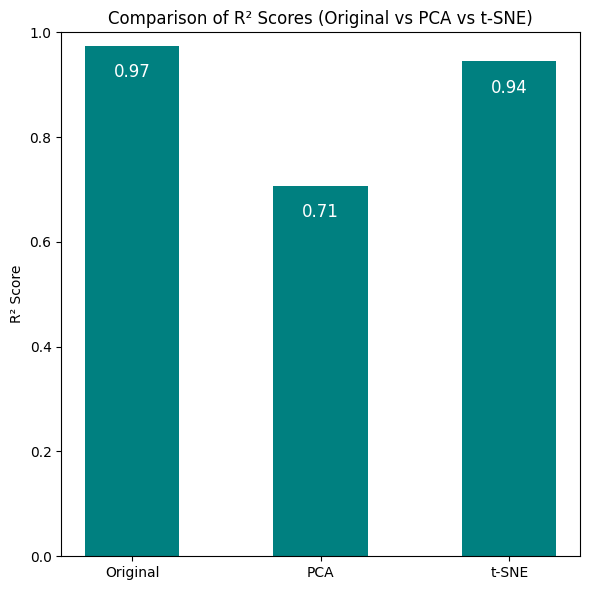

In [ ]:
r2_scores_comparison = {"Original": rf_r2, "PCA": r2_pca, "t-SNE": r2_tsne}

plt.figure(figsize=(6, 6))
bars = plt.bar(r2_scores_comparison.keys(), r2_scores_comparison.values(), color=['teal'], width=0.5)
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores (Original vs PCA vs t-SNE)")
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f"{yval:.2f}", ha='center', va='center', fontsize=12, color='white')


plt.tight_layout()
plt.show()

Residual Plot & Prediction vs Actual for the Best Model

Text(0, 0.5, 'Density')

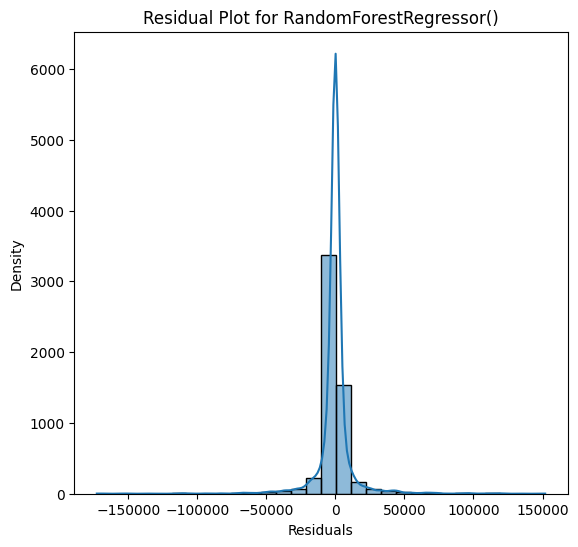

In [ ]:
y_pred_best = y_pred_rf
residuals = test_labels - y_pred_best

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title(f"Residual Plot for {rf_model}")
plt.xlabel("Residuals")
plt.ylabel("Density")

Prediction vs. Actual

<ipython-input-50-d3d4a1974b36>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--', color='red')  # Diagonal Line


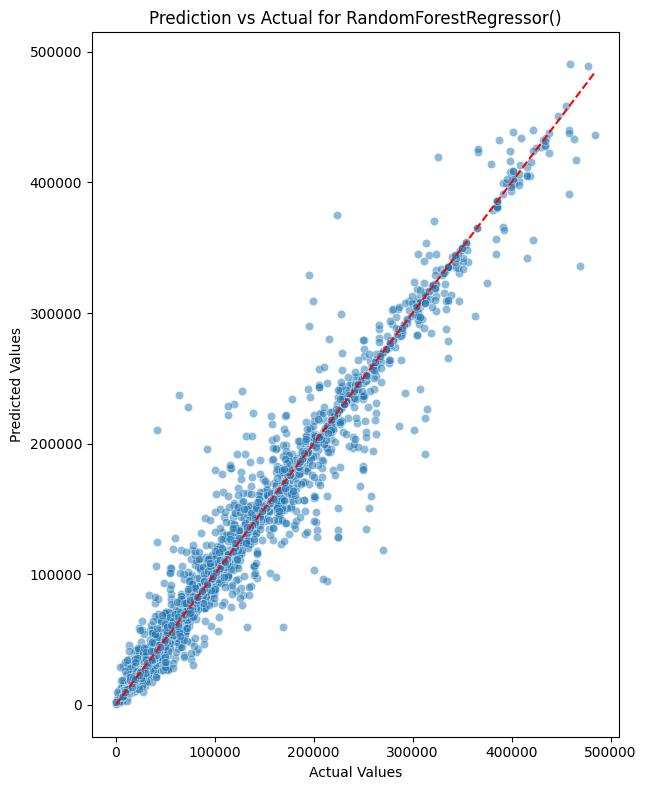

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x=test_labels, y=y_pred_best, alpha=0.5)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--', color='red')  # Diagonal Line
plt.title(f"Prediction vs Actual for {rf_model}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()